# Financial Data Simulation & Analysis

This project shows a deeper understanding by proving you can create data from scratch using mathematical rules, a skill often used in financial modeling and for testing ML models.

- **Project:** Simulate and Analyze Stock Price Movements.
- **Dataset:** You will generate this yourself using NumPy.
- **Your Goal:** Simulate a stock's price for 365 days using a "random walk" model. Then, analyze the simulated data and its volatility.

## Section 1: Introduction & Setup

### 1. Import Necessary Libraries

This first step is to import the essential Python libraries for our data analysis. We will be using:
- **Pandas:** For data manipulation and creating DataFrames.
- **NumPy:** For numerical operations and generating random data.
- **Matplotlib:** For creating static, animated, and interactive visualizations.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Section 2: Data Generation (NumPy)

### 2. Set Initial Parameters

Set a starting stock price and the number of days for the simulation.

In [2]:
start_price = 150
days = 365

### 3. Generate Daily Returns

Generate 365 daily "returns" (small daily changes) using NumPy's random number generator. This simulates a slight upward trend with some volatility.

In [3]:
returns = np.random.normal(loc=0.004, scale= 0.04, size=days)

### 4. Build the Stock Price Path

Create the stock price for each day. A simple way is to start with the initial price and for each day, multiply the previous day's price by (1 + the daily return).

In [4]:
price = np.empty(days)
price[0] = start_price
for i in range(1,days,1):
    price[i] =  price[i-1] * (1 + returns[i])

## Section 3: Structuring Data (Pandas)

### 5. Create a Date Range

Create a date range for the 365 days of the simulation.

In [5]:
dates = pd.date_range(start='2025-01-01', periods=days)
dates

DatetimeIndex(['2025-01-01', '2025-01-02', '2025-01-03', '2025-01-04',
               '2025-01-05', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-09', '2025-01-10',
               ...
               '2025-12-22', '2025-12-23', '2025-12-24', '2025-12-25',
               '2025-12-26', '2025-12-27', '2025-12-28', '2025-12-29',
               '2025-12-30', '2025-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

### 6. Create a DataFrame

Create a Pandas DataFrame with the dates as the index and the simulated stock price as a column.

In [6]:
df = pd.DataFrame(price, index=dates, columns=['Price'])
df.head()

,Price
2025-01-01,150.000000
2025-01-02,155.658712
2025-01-03,155.076210
2025-01-04,152.530941
2025-01-05,158.187220


## Section 4: Analysis (Pandas)

### 7. Calculate Rolling/Moving Average

Calculate the rolling/moving average for 30 days and 90 days. This is a common technical indicator used to smooth out price data.

In [7]:
df['30-Day MA'] = df['Price'].rolling(window=30).mean()
df['90-Day MA'] = df['Price'].rolling(window=90).mean()
#df.head(35)  # Display the first 35 rows to see the moving averages

### 8. Find Highest and Lowest Prices

Find the highest and lowest price in the simulation and the dates on which they occurred.

In [8]:
print(f"Highest Price : {df['Price'].max()} on {df['Price'].idxmax()}")
print(f"Lowest Price : {df['Price'].min()} on {df['Price'].idxmin()}")

Highest Price : 810.0382343163157 on 2025-12-25 00:00:00
Lowest Price : 131.18204626204118 on 2025-04-30 00:00:00


### 9. Calculate Daily Percentage Returns

Calculate the daily percentage returns from your price column.

In [9]:
df['Daily % Change'] = df['Price'].pct_change()
df.head()

,Price,30-Day MA,90-Day MA,Daily % Change
2025-01-01,150.000000,NaN,NaN,NaN
2025-01-02,155.658712,NaN,NaN,0.037725
2025-01-03,155.076210,NaN,NaN,-0.003742
2025-01-04,152.530941,NaN,NaN,-0.016413
2025-01-05,158.187220,NaN,NaN,0.037083


## Section 5: Visualization (Matplotlib)

### 10. Line Plot

Plot the simulated 'Stock Price' over time.

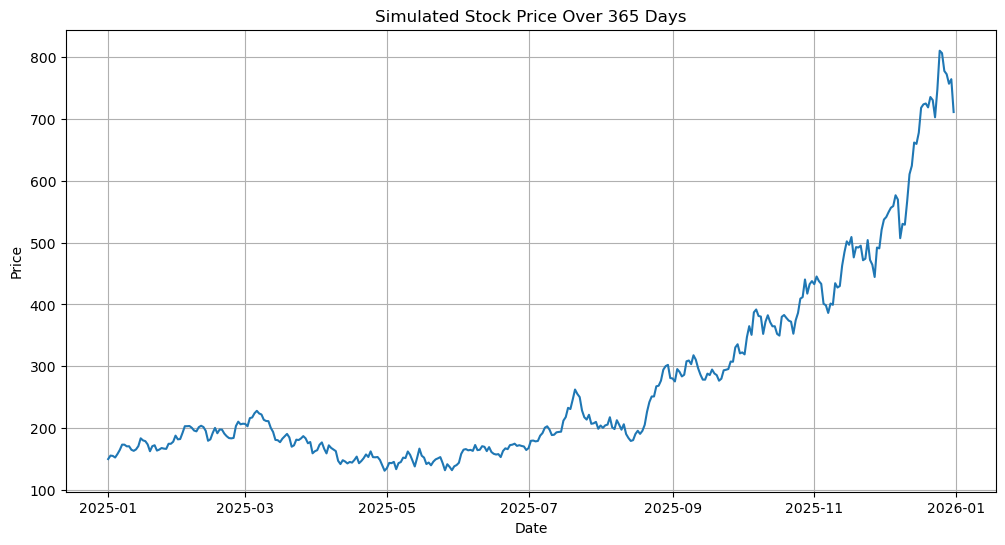

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price'])
plt.title('Simulated Stock Price Over 365 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### 11. Combined Plot

On the same graph, plot the 'Stock Price', the '30-Day Moving Average', and the '90-Day Moving Average'. Use different colors and a legend.

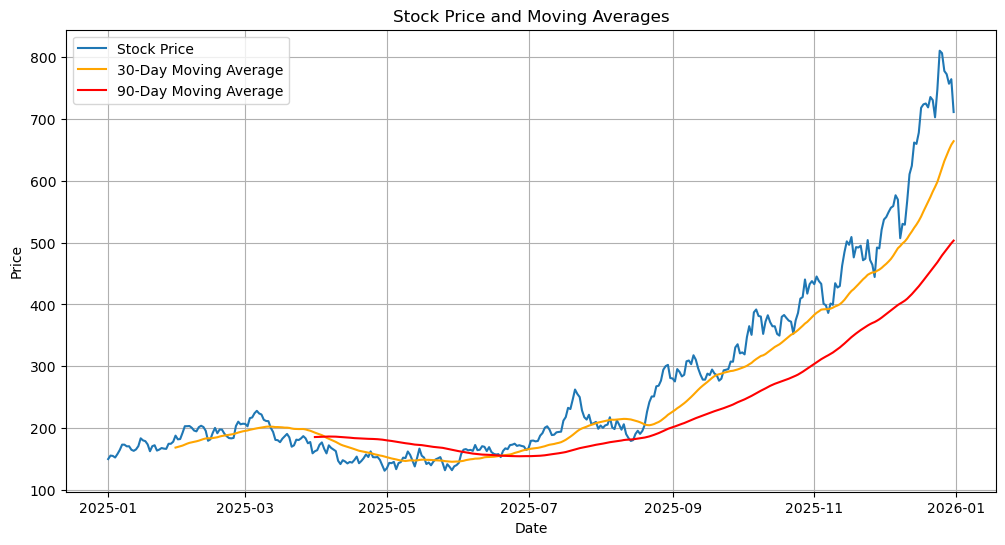

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price'], label='Stock Price')
plt.plot(df['30-Day MA'], label='30-Day Moving Average', color='orange')
plt.plot(df['90-Day MA'], label='90-Day Moving Average', color='red')
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### 12. Histogram

Plot a histogram of the 'Daily Returns' you calculated. (It should look like a normal distribution, centered near 0).

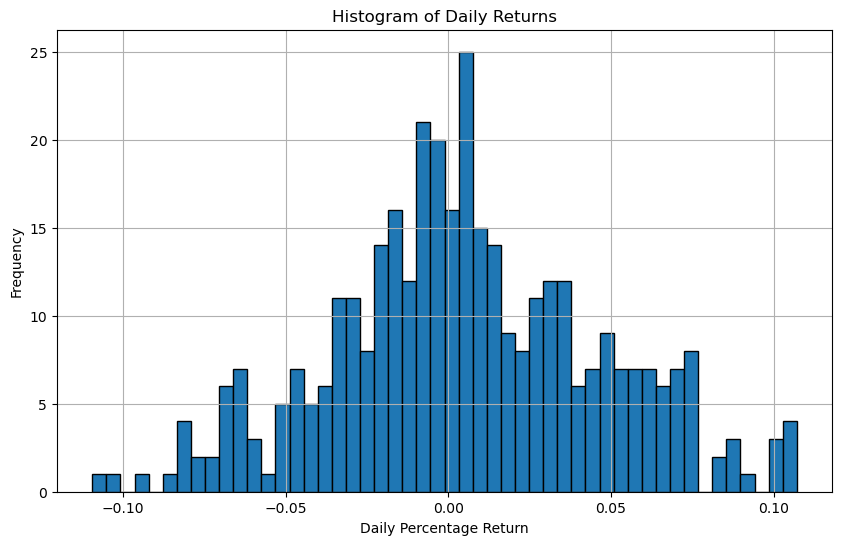

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['Daily % Change'].dropna(), bins=50, edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Percentage Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()